## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, hinge_loss
from sklearn.neural_network import MLPClassifier

# Part A

## Data

In [3]:
df = pd.DataFrame({
    'X': [-1, -6, 2, 2, 2, 4, -4, -6],
    'Y': [-1, -3, 2, 4, -3, -5, 5, 3],
    'Sign': ['-', '-', '-', '-', '+', '+', '+', '+']
})

In [4]:
df

,X,Y,Sign
0,-1,-1,-
1,-6,-3,-
2,2,2,-
3,2,4,-
4,2,-3,+
5,4,-5,+
6,-4,5,+
7,-6,3,+


## Making Labels

In [5]:
df ['Label'] = df['Sign'].apply(lambda x: -1 if x == '-' else 1)

In [6]:
df

,X,Y,Sign,Label
0,-1,-1,-,-1
1,-6,-3,-,-1
2,2,2,-,-1
3,2,4,-,-1
4,2,-3,+,1
5,4,-5,+,1
6,-4,5,+,1
7,-6,3,+,1


In [7]:
X = np.array(df[['X', 'Y']])
X

array([[-1, -1],
       [-6, -3],
       [ 2,  2],
       [ 2,  4],
       [ 2, -3],
       [ 4, -5],
       [-4,  5],
       [-6,  3]], dtype=int64)

In [8]:
y = list(df['Label'])
y

[-1, -1, -1, -1, 1, 1, 1, 1]

## Plot Data

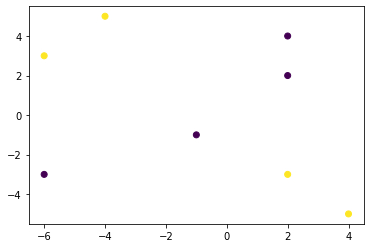

In [9]:
plt.scatter(df['X'], df['Y'], c = df['Label'])

## Method 1. SVM.LinearSVC, C = 10: 

In [10]:
clf = svm.LinearSVC(loss='hinge', C = 10)
clf.fit(X, y)

print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         4
           1       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [11]:
w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print(f'weights:{w}, bias :{b}')

weights:[-0.21621702 -0.27026228], bias :[0.51348475]


In [12]:
margin = 1 / np.sqrt(np.sum(w ** 2))
print(f'margin:{margin}')

margin:2.8892625074122127


## Method 1. Plot and Compute Margin

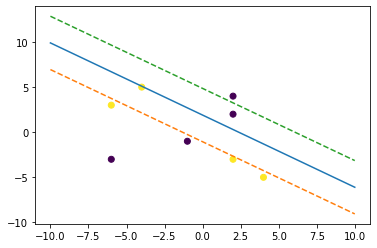

In [13]:
x_bar = np.linspace(-10, 10)
y_bar = (-w[0] * x_bar - (b))/w[1]

down_margin = y_bar - np.sqrt(1 + (w[0]/[1]) ** 2) * margin
up_margin = y_bar + np.sqrt(1 + (w[0]/[1]) ** 2) * margin

plt.figure()
plt.scatter(df['X'], df['Y'], c = df['Label'])
plt.plot(x_bar, y_bar)
plt.plot(x_bar, down_margin, '--')
plt.plot(x_bar, up_margin, '--')


## Method 1 Last Loss 

In [14]:
hinge_loss(y, clf.predict(X))

0.5

## Method 2. SVM.SVC, C = 10, Linear: 

In [15]:
clf = svm.SVC(kernel='linear', C = 10)
clf.fit(X, y)

print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         4
           1       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [16]:
w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print(f'weights:{w}, bias :{b}')

weights:[-0.21622007 -0.27023943], bias :[0.51349295]


In [17]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print(f'margin:{margin}')

margin:2.8893955216024567


## Method 2. Plot and Compute Margin

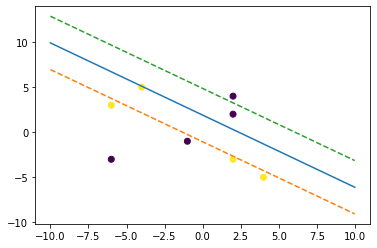

In [18]:
x_bar = np.linspace(-10, 10)
y_bar = (-w[0] * x_bar - (b))/w[1]

down_margin = y_bar - np.sqrt(1 + (w[0]/[1]) ** 2) * margin
up_margin = y_bar + np.sqrt(1 + (w[0]/[1]) ** 2) * margin

plt.figure()
plt.scatter(df['X'], df['Y'], c = df['Label'])
plt.plot(x_bar, y_bar)
plt.plot(x_bar, down_margin, '--')
plt.plot(x_bar, up_margin, '--')


## Method 2. Last Loss 

In [19]:
hinge_loss(y, clf.predict(X))

0.5

# Part B

## Kernel 

In [20]:
def feature_map_quadratic(X):  
    return np.asarray(( np.sqrt(2) * X[:,0] * X[:,1], X[:,0] **2 , X[:,1] **2 )).T

def kernel_quadratic(X,X_Prime):
    return np.dot(feature_map_quadratic(X),feature_map_quadratic(X_Prime).T )

## Projected Data

In [21]:
projected_X = feature_map_quadratic(X)
projected_X

array([[  1.41421356,   1.        ,   1.        ],
       [ 25.45584412,  36.        ,   9.        ],
       [  5.65685425,   4.        ,   4.        ],
       [ 11.3137085 ,   4.        ,  16.        ],
       [ -8.48528137,   4.        ,   9.        ],
       [-28.28427125,  16.        ,  25.        ],
       [-28.28427125,  16.        ,  25.        ],
       [-25.45584412,  36.        ,   9.        ]])

## Plot Data: now data is linear sepratable

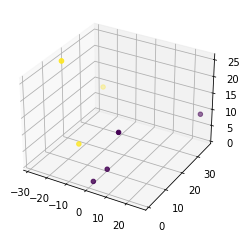

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(projected_X[:,0], projected_X[:,1], projected_X[:,2],c = y)

## Method 1. SVM.LinearSVC, C = 10: 

In [23]:
clf = svm.LinearSVC(loss='hinge', C = 10)
clf.fit(projected_X, y)

print(classification_report(y, clf.predict(projected_X)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [24]:
w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print(f'weights:{w}, bias :{b}')

weights:[-0.35773251 -0.17021277 -0.12884161], bias :[-0.19503546]


In [25]:
margin = 1 / np.sqrt(np.sum(w ** 2))
print(f'margin:{margin}')

margin:2.4004564558060477


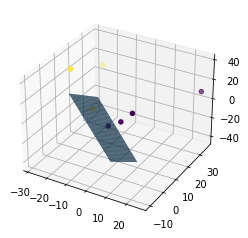

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(projected_X[:,0], projected_X[:,1], projected_X[:,2],c = y)


x_bar, y_bar = np.meshgrid(np.linspace(-10,10), np.linspace(-10,10))
surface = (-w[0] * x_bar - w[1] * y_bar - b)/w[2]
ax.plot_surface(x_bar, y_bar, surface)

## Method 2. SVM.SVC, C = 10, Linear: 

In [27]:
clf = svm.SVC(kernel = 'linear', C = 10)
clf.fit(projected_X, y) 

print(classification_report(y, clf.predict(projected_X)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [28]:
w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print(f'weights:{w}, bias :{b}')

weights:[-0.1287864   0.03235671  0.0785012 ], bias :[-0.92861572]


In [29]:
margin = 1 / np.sqrt(np.sum(w ** 2))
margin

6.482673170291573

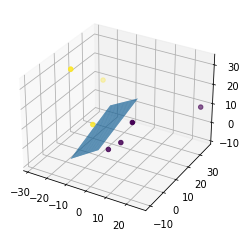

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(projected_X[:,0], projected_X[:,1], projected_X[:,2],c = y)


x_bar, y_bar = np.meshgrid(np.linspace(-10,10), np.linspace(-10,10))
surface = (-w[0] * x_bar - w[1] * y_bar - b)/w[2]
ax.plot_surface(x_bar, y_bar, surface)


## Method 3. SVM.SVC, C = 10, My Kernel: 

In [31]:
clf = svm.SVC(kernel = kernel_quadratic, C = 10)
clf.fit(X, y)

SVC(C=10, kernel=<function kernel_quadratic at 0x0000026BDE57BF28>)

In [32]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# Part C

In [33]:
clf = MLPClassifier(solver='lbfgs', max_iter = 1000, alpha=0.0001, hidden_layer_sizes=(3,2))
clf.fit(X, y)

MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=1000, solver='lbfgs')

In [34]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

